# **KH6006CEM** – **Machine Learning and Related Applications**
# **Mai Elmeligy** – **202101086**

# Import Necessary Libraries


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
)
from sklearn.svm import SVC
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# Paths for Dataset

In [2]:
train_dir = '/Users/maielmeligy/Desktop/machinelearning/fer2013/train'
test_dir = '/Users/maielmeligy/Desktop/machinelearning/fer2013/test'


# Data Preprocessing

In [3]:
datagen = ImageDataGenerator(rescale=1.0 / 255.0)
train_data = datagen.flow_from_directory(
    train_dir,
    target_size=(48, 48),
    color_mode="grayscale",
    batch_size=32,
    class_mode="categorical"
)
test_data = datagen.flow_from_directory(
    test_dir,
    target_size=(48, 48),
    color_mode="grayscale",
    batch_size=32,
    class_mode="categorical"
)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


# Flatten data for SVM and Random Forest

In [4]:
X_train, y_train = train_data[0][0], train_data[0][1].argmax(axis=1)
X_test, y_test = test_data[0][0], test_data[0][1].argmax(axis=1)
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)


# **Train and Fine-Tune SVM**

In [5]:
svm_model = SVC(kernel="linear", C=1.0, probability=True)
svm_model.fit(X_train_flat, y_train)
svm_predictions = svm_model.predict(X_test_flat)
svm_probabilities = svm_model.predict_proba(X_test_flat)


# **Train and Fine-Tune Random Forest**

In [6]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_flat, y_train)
rf_predictions = rf_model.predict(X_test_flat)
rf_probabilities = rf_model.predict_proba(X_test_flat)


# **Train CNN**

In [7]:
cnn_model = Sequential(
    [
        Conv2D(32, (3, 3), activation="relu", input_shape=(48, 48, 1)),
        MaxPooling2D((2, 2)),
        Dropout(0.25),
        Conv2D(64, (3, 3), activation="relu"),
        MaxPooling2D((2, 2)),
        Dropout(0.25),
        Flatten(),
        Dense(128, activation="relu"),
        Dropout(0.5),
        Dense(len(train_data.class_indices), activation="softmax"),
    ]
)
cnn_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)
history = cnn_model.fit(train_data, validation_data=test_data, epochs=10)
cnn_probabilities = cnn_model.predict(test_data)
cnn_predictions = np.argmax(cnn_probabilities, axis=1)
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score


y_true_binarized = label_binarize(test_data.classes, classes=list(range(len(train_data.class_indices))))


try:
    cnn_roc_auc = roc_auc_score(y_true_binarized, cnn_probabilities, multi_class='ovo', average='weighted')
    print(f"CNN ROC-AUC: {cnn_roc_auc:.4f}")
except ValueError as e:
    cnn_roc_auc = None
    print("Error calculating CNN ROC-AUC:", e)

Epoch 1/10


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


898/898 ━━━━━━━━━━━━━━━━━━━━ 22s 24ms/step - accuracy: 0.2586 - loss: 1.8034 - val_accuracy: 0.4230 - val_loss: 1.5370
Epoch 2/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 21s 23ms/step - accuracy: 0.3866 - loss: 1.5810 - val_accuracy: 0.4508 - val_loss: 1.4349
Epoch 3/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 21s 24ms/step - accuracy: 0.4282 - loss: 1.4768 - val_accuracy: 0.4756 - val_loss: 1.3819
Epoch 4/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 21s 23ms/step - accuracy: 0.4505 - loss: 1.4254 - val_accuracy: 0.4955 - val_loss: 1.3240
Epoch 5/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 21s 24ms/step - accuracy: 0.4593 - loss: 1.3951 - val_accuracy: 0.5015 - val_loss: 1.3076
Epoch 6/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 21s 23ms/step - accuracy: 0.4783 - loss: 1.3455 - val_accuracy: 0.5107 - val_loss: 1.2814
Epoch 7/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 21s 24ms/step - accuracy: 0.4914 - loss: 1.3133 - val_accuracy: 0.5156 - val_loss: 1.2597
Epoch 8/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 21s 24ms/step - accuracy: 0.5009 - loss: 1.2864 - val_accurac

# Evaluation with ROC-AUC

In [8]:
def evaluate_model_with_roc(predictions, probabilities, y_true, model_name):
    accuracy = accuracy_score(y_true, predictions)
    precision = precision_score(y_true, predictions, average="weighted", zero_division=0)
    recall = recall_score(y_true, predictions, average="weighted", zero_division=0)
    f1 = f1_score(y_true, predictions, average="weighted", zero_division=0)

    try:
        roc_auc = roc_auc_score(y_true, probabilities, multi_class="ovo", average="weighted")
    except ValueError:
        roc_auc = None

    print(f"{model_name} Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}" if roc_auc else "ROC-AUC: Not Available")

    return accuracy, precision, recall, f1, roc_auc


# **Evaluate Models**

In [9]:
svm_metrics = evaluate_model_with_roc(svm_predictions, svm_probabilities, y_test, "SVM")
rf_metrics = evaluate_model_with_roc(rf_predictions, rf_probabilities, y_test, "Random Forest")
cnn_metrics = evaluate_model_with_roc(cnn_predictions, cnn_probabilities, test_data.classes, "CNN")


SVM Metrics:
Accuracy: 0.2812
Precision: 0.2943
Recall: 0.2812
F1-Score: 0.2738
ROC-AUC: 0.5675
Random Forest Metrics:
Accuracy: 0.1875
Precision: 0.1004
Recall: 0.1875
F1-Score: 0.1302
ROC-AUC: 0.5137
CNN Metrics:
Accuracy: 0.1707
Precision: 0.1640
Recall: 0.1707
F1-Score: 0.1636
ROC-AUC: 0.4939


In [12]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV


param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
}


svm = SVC(probability=True)  
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_flat, y_train)


svm_best = grid_search.best_estimator_


svm_predictions = svm_best.predict(X_test_flat)
svm_probabilities = svm_best.predict_proba(X_test_flat)


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


In [13]:
svm_metrics = evaluate_model_with_roc(svm_predictions, svm_probabilities, y_test, "SVM")

SVM Metrics:
Accuracy: 0.2188
Precision: 0.0479
Recall: 0.2188
F1-Score: 0.0785
ROC-AUC: 0.4722


In [14]:
from sklearn.ensemble import RandomForestClassifier


param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
}

rf = RandomForestClassifier()
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train_flat, y_train)


rf_best = grid_search_rf.best_estimator_


rf_predictions = rf_best.predict(X_test_flat)
rf_probabilities = rf_best.predict_proba(X_test_flat)


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


In [15]:
rf_metrics = evaluate_model_with_roc(rf_predictions, rf_probabilities, y_test, "Random Forest")


Random Forest Metrics:
Accuracy: 0.3125
Precision: 0.2474
Recall: 0.3125
F1-Score: 0.2714
ROC-AUC: 0.5811


# Evaluate SVM and RF

In [17]:
svm_metrics = evaluate_model_with_roc(svm_predictions, svm_probabilities, y_test, "SVM")
rf_metrics = evaluate_model_with_roc(rf_predictions, rf_probabilities, y_test, "Random Forest")


SVM Metrics:
Accuracy: 0.2188
Precision: 0.0479
Recall: 0.2188
F1-Score: 0.0785
ROC-AUC: 0.4722
Random Forest Metrics:
Accuracy: 0.3125
Precision: 0.2474
Recall: 0.3125
F1-Score: 0.2714
ROC-AUC: 0.5811


# Evaluate CNN

In [18]:
cnn_predictions = np.argmax(cnn_model.predict(test_data), axis=1)
cnn_accuracy = accuracy_score(test_data.classes, cnn_predictions)
cnn_precision = precision_score(test_data.classes, cnn_predictions, average='weighted', zero_division=0)
cnn_recall = recall_score(test_data.classes, cnn_predictions, average='weighted', zero_division=0)
cnn_f1 = f1_score(test_data.classes, cnn_predictions, average='weighted', zero_division=0)


225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step


# Build and fine-tune Random Forest

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


rf_params = {
    'n_estimators': [50, 100, 150],   
    'max_depth': [10, 20, None],      
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4]     
}


rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=5, verbose=2, n_jobs=-1)
rf_grid.fit(X_train_flat, y_train)  


rf_best = rf_grid.best_estimator_
print("Best Parameters for Random Forest:", rf_grid.best_params_)


Fitting 5 folds for each of 81 candidates, totalling 405 fits


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   

# Evaluate Random Forest

Random Forest Evaluation:
Accuracy: 0.2812
Precision: 0.1727
Recall: 0.2812
F1-Score: 0.2128

Classification Report:
               precision    recall  f1-score   support

       angry       0.00      0.00      0.00         1
        fear       0.00      0.00      0.00         6
       happy       0.38      0.71      0.50         7
     neutral       0.25      0.38      0.30         8
         sad       0.17      0.20      0.18         5
    surprise       0.00      0.00      0.00         5

    accuracy                           0.28        32
   macro avg       0.13      0.21      0.16        32
weighted avg       0.17      0.28      0.21        32



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

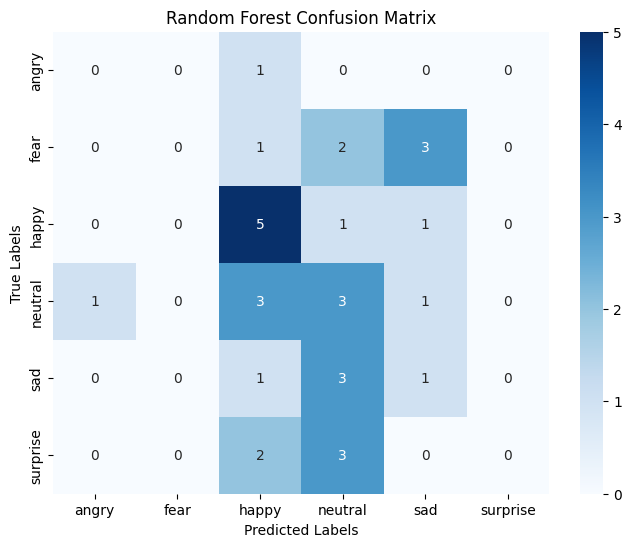

In [20]:

def evaluate_random_forest_fixed(model, X_test, y_test, all_class_labels):
   
    predictions = model.predict(X_test)
    

    unique_classes = np.unique(y_test)
    matched_class_labels = [all_class_labels[i] for i in unique_classes]
    
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, average='weighted', zero_division=0)
    recall = recall_score(y_test, predictions, average='weighted', zero_division=0)
    f1 = f1_score(y_test, predictions, average='weighted', zero_division=0)
    

    print("Random Forest Evaluation:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    

    print("\nClassification Report:\n", classification_report(y_test, predictions, target_names=matched_class_labels))
    
   
    conf_matrix = confusion_matrix(y_test, predictions, labels=unique_classes)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=matched_class_labels, yticklabels=matched_class_labels)
    plt.title("Random Forest Confusion Matrix")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()
    
    return accuracy, precision, recall, f1


class_labels = list(train_data.class_indices.keys()) 
rf_metrics = evaluate_random_forest_fixed(rf_best, X_test_flat, y_test, class_labels)


# Plot Random Forest Feature Importance

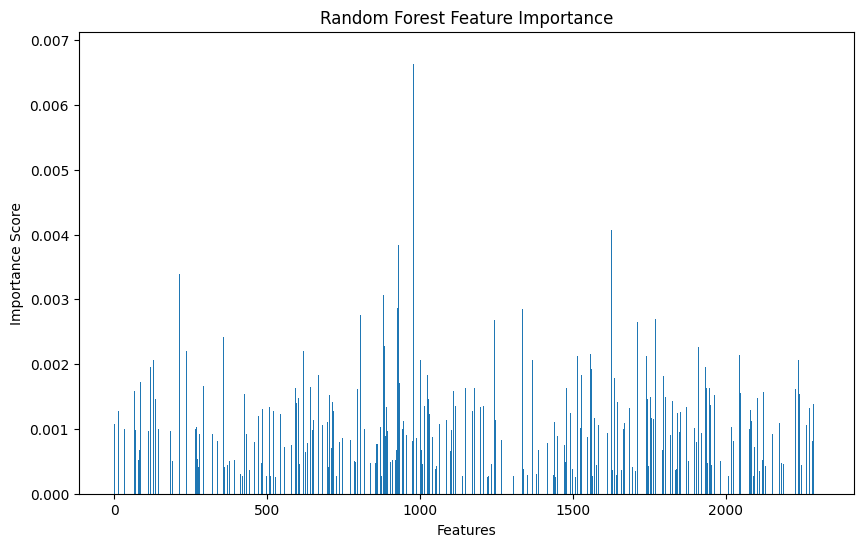

In [21]:

def plot_feature_importance(model, feature_names):
    importance = model.feature_importances_
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(importance)), importance)
    plt.title("Random Forest Feature Importance")
    plt.xlabel("Features")
    plt.ylabel("Importance Score")
    plt.show()


plot_feature_importance(rf_best, feature_names=None)  


# Hyperparameter tuning using GridSearchCV

In [22]:
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2)
grid.fit(X_train_flat, y_train)
print("Best Parameters for SVM:", grid.best_params_)
best_svm_model = grid.best_estimator_

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END ..................................C=0.1, kernel=rbf; total time=   0.0s
[CV] END ..................................C=0.1, kernel=rbf; total time=   0.0s
[CV] END ..................................C=0.1, kernel=rbf; total time=   0.0s
[CV] END ..................................C=0.1, kernel=rbf; total time=   0.0s
[CV] END ..................................C=0.1, kernel=rbf; total time=   0.0s
[CV] END .................................C=1, kernel=linear; total time=   0.0s
[CV] END .................................C=1, ke

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


# Build CNN Model

In [23]:
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(train_data.class_indices), activation='softmax')
])

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Compile CNN Model

In [24]:
cnn_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


# Train CNN Model


In [25]:
history = cnn_model.fit(
    train_data,
    validation_data=test_data,
    epochs=10  
)

Epoch 1/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 21s 23ms/step - accuracy: 0.2745 - loss: 1.7782 - val_accuracy: 0.4076 - val_loss: 1.5257
Epoch 2/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 22s 25ms/step - accuracy: 0.3985 - loss: 1.5491 - val_accuracy: 0.4635 - val_loss: 1.4036
Epoch 3/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 21s 23ms/step - accuracy: 0.4395 - loss: 1.4464 - val_accuracy: 0.4809 - val_loss: 1.3669
Epoch 4/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 21s 23ms/step - accuracy: 0.4639 - loss: 1.3874 - val_accuracy: 0.5004 - val_loss: 1.3142
Epoch 5/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 20s 23ms/step - accuracy: 0.4844 - loss: 1.3487 - val_accuracy: 0.5061 - val_loss: 1.2863
Epoch 6/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 21s 23ms/step - accuracy: 0.4963 - loss: 1.3128 - val_accuracy: 0.5163 - val_loss: 1.2653
Epoch 7/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 21s 23ms/step - accuracy: 0.5165 - loss: 1.2654 - val_accuracy: 0.5201 - val_loss: 1.2404
Epoch 8/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 21s 23ms/step - accuracy: 0.5209 - loss: 1.2535 - 

# Evaluate CNN Model


In [26]:
cnn_loss, cnn_accuracy = cnn_model.evaluate(test_data)
print(f"CNN Accuracy: {cnn_accuracy:.4f}")

225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5337 - loss: 1.2208
CNN Accuracy: 0.5298



# Plot CNN Training Results


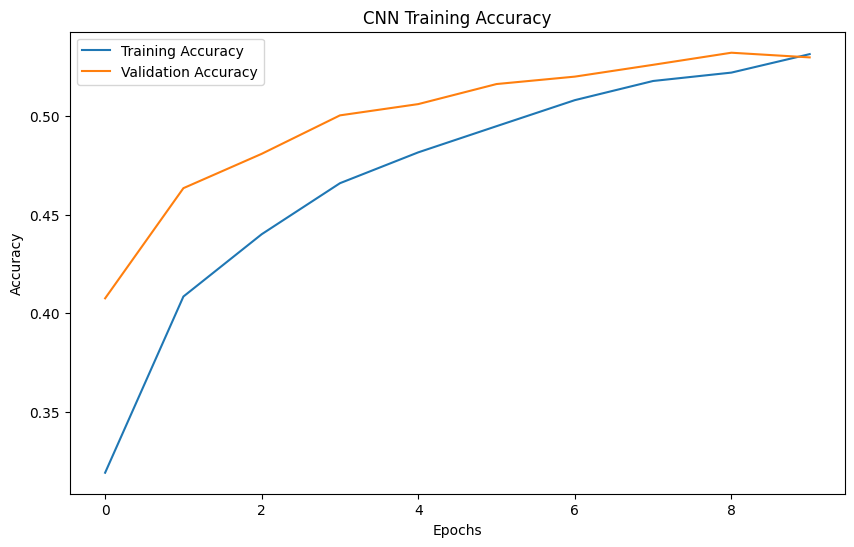

In [27]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# CNN Confusion Matrix


In [28]:
y_pred_cnn = cnn_model.predict(test_data)
y_pred_classes_cnn = np.argmax(y_pred_cnn, axis=1)
y_true_cnn = test_data.classes

cnn_conf_matrix = confusion_matrix(y_true_cnn, y_pred_classes_cnn)
print("CNN Confusion Matrix:")
print(cnn_conf_matrix)

225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step
CNN Confusion Matrix:
[[134   2  55 241 218 198 110]
 [ 18   0   3  29  29  23   9]
 [136   2  54 256 223 223 130]
 [249   1  98 485 380 364 197]
 [175   2  69 334 277 246 130]
 [146   1  72 347 290 254 137]
 [103   0  62 221 179 162 104]]


# Plot CNN Confusion Matrix


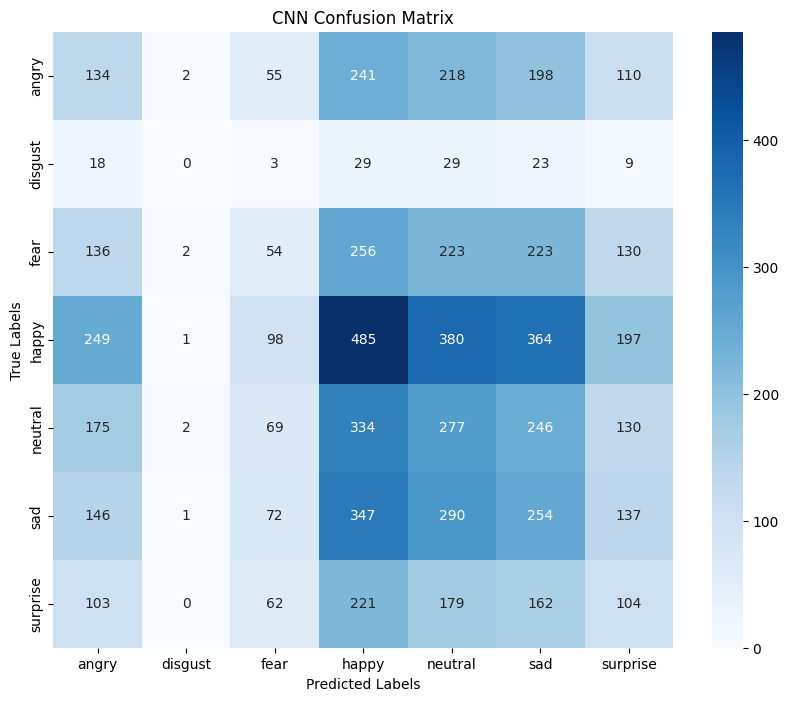

In [29]:
plt.figure(figsize=(10, 8))
sns.heatmap(cnn_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=train_data.class_indices.keys(), yticklabels=train_data.class_indices.keys())
plt.title('CNN Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


# Save the CNN Model


In [30]:
cnn_model.save('emotion_recognition_model.h5')
plt.savefig('cnn_training_accuracy.png')  
plt.savefig('svm_confusion_matrix.png')
plt.savefig('cnn_confusion_matrix.png')

<Figure size 640x480 with 0 Axes>


# Export SVM and CNN Results and compare both models


In [31]:
print("Model Comparisons:")
print(f"SVM Accuracy: {accuracy_score(y_test, svm_predictions):.4f}")
print(f"CNN Accuracy: {cnn_accuracy:.4f}")

Model Comparisons:
SVM Accuracy: 0.2188
CNN Accuracy: 0.5298



# Save results in a file 


In [32]:
with open('model_results.txt', 'w') as f:
    f.write(f"SVM Accuracy: {accuracy_score(y_test, svm_predictions):.4f}\n")
    f.write(f"CNN Accuracy: {cnn_accuracy:.4f}\n")
    f.write("SVM Classification Report:\n")
    f.write(classification_report(y_test, svm_predictions))

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

# Save results to text files


In [33]:
with open('svm_results.txt', 'w') as f:
    f.write(f"SVM Accuracy: {accuracy_score(y_test, svm_predictions):.4f}\n")
    f.write("SVM Classification Report:\n")
    f.write(classification_report(y_test, svm_predictions))
with open('cnn_results.txt', 'w') as f:
    f.write(f"CNN Accuracy: {cnn_accuracy:.4f}\n")
    f.write("CNN Confusion Matrix:\n")
    f.write(str(cnn_conf_matrix))

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

In [34]:
cnn_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       819,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,517,143 (9.60 MB)

 Trainable params: 839,047 (3.20 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,678,096 (6.40 MB)

# Defining CNN architecture model

In [35]:
from tensorflow.keras import Input
from tensorflow.keras.models import Model

inputs = Input(shape=(48, 48, 1))
x = Conv2D(32, (3, 3), activation='relu')(inputs)
x = MaxPooling2D((2, 2))(x)
x = Dropout(0.25)(x)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(len(train_data.class_indices), activation='softmax')(x)
cnn_model = Model(inputs=inputs, outputs=outputs)
cnn_model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
cnn_model.summary()
cnn_prob_predictions = cnn_model.predict(test_data)



Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 48, 48, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 16928)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     2,166,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,168,135 (8.27 MB)

 Trainable params: 2,168,135 (8.27 MB)

 Non-trainable params: 0 (0.00 B)

225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step


# Feature maps

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


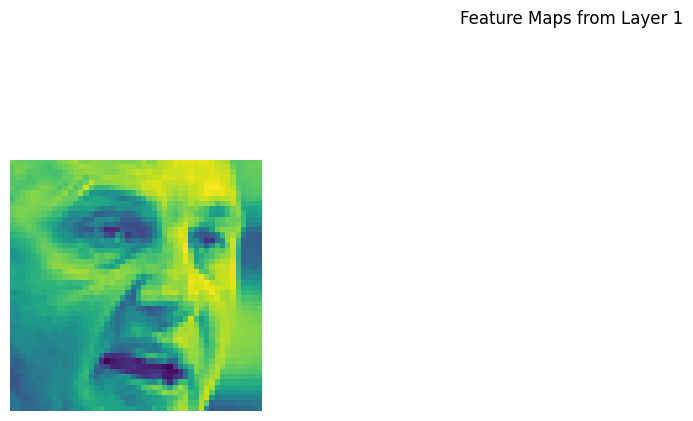

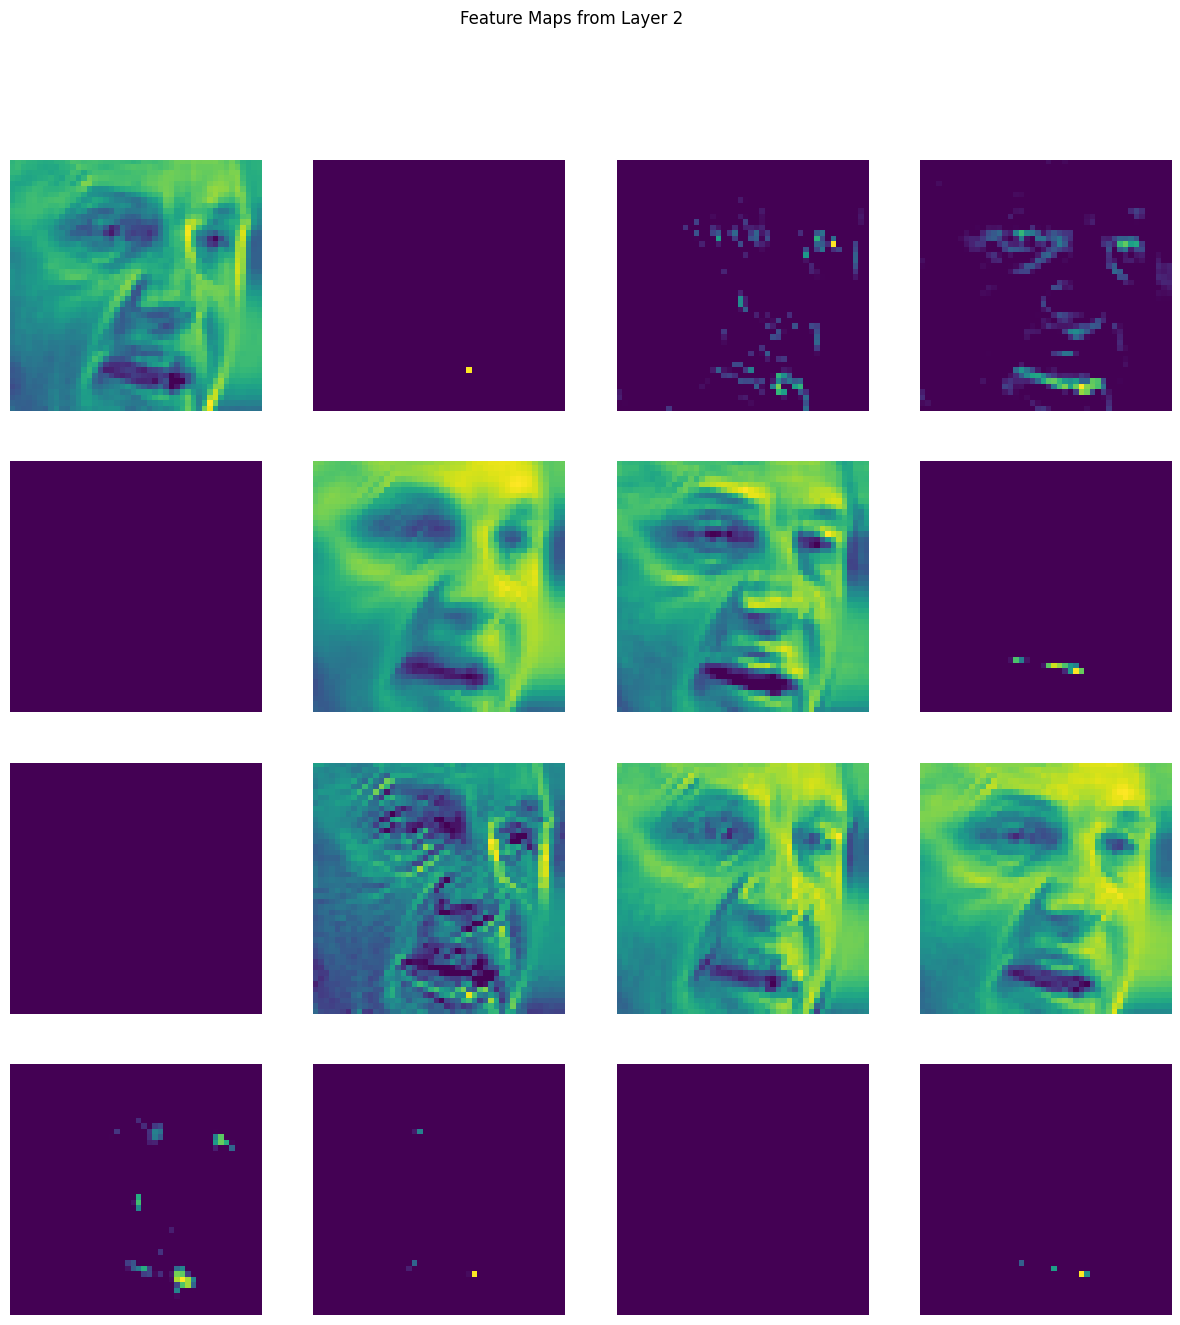

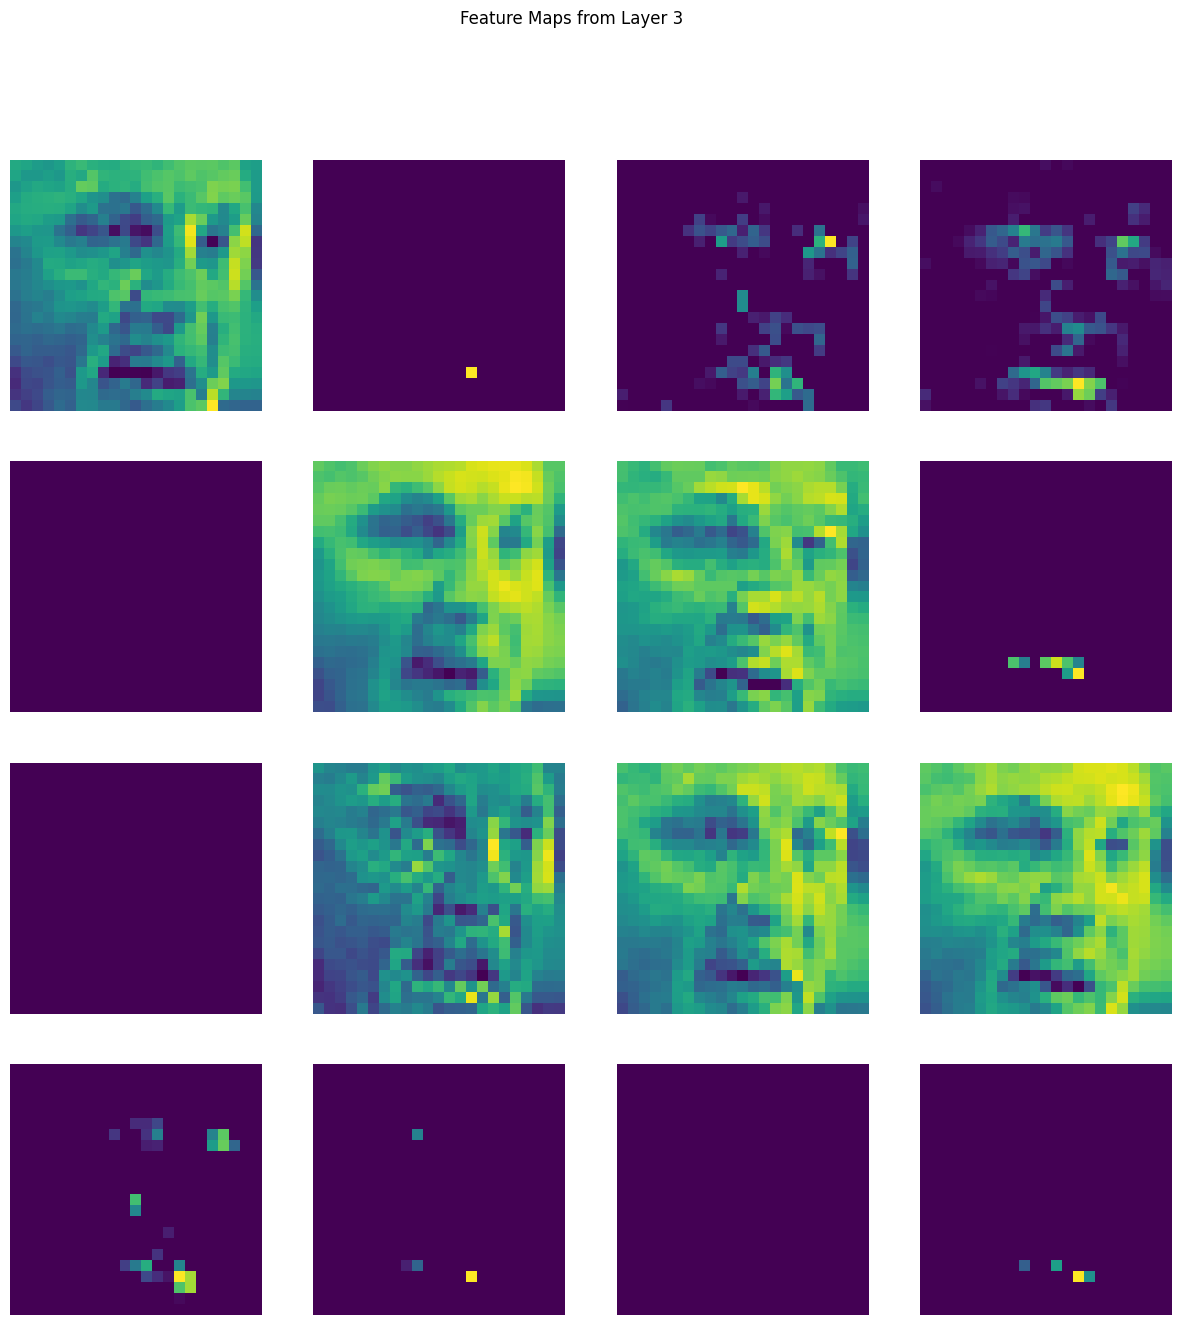

In [36]:
dummy_input = np.random.rand(1, 48, 48, 1)  
_ = cnn_model.predict(dummy_input)  


layer_outputs = [layer.output for layer in cnn_model.layers[:3]]
feature_model = Model(inputs=cnn_model.input, outputs=layer_outputs)


test_img = X_test[0]  
test_img = np.expand_dims(test_img, axis=0)  


feature_maps = feature_model.predict(test_img)
for layer_index, feature_map in enumerate(feature_maps):
    num_filters = feature_map.shape[-1]  
    plt.figure(figsize=(15, 15))
    for i in range(min(num_filters, 16)):  
        plt.subplot(4, 4, i + 1)
        plt.imshow(feature_map[0, :, :, i], cmap='viridis')
        plt.axis('off')
    plt.suptitle(f'Feature Maps from Layer {layer_index + 1}')
    plt.show()


# SVM feature importance and heat map

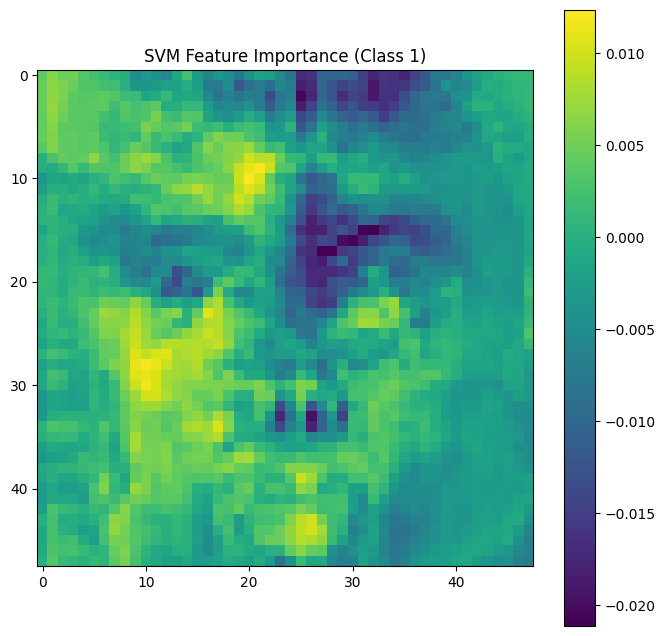

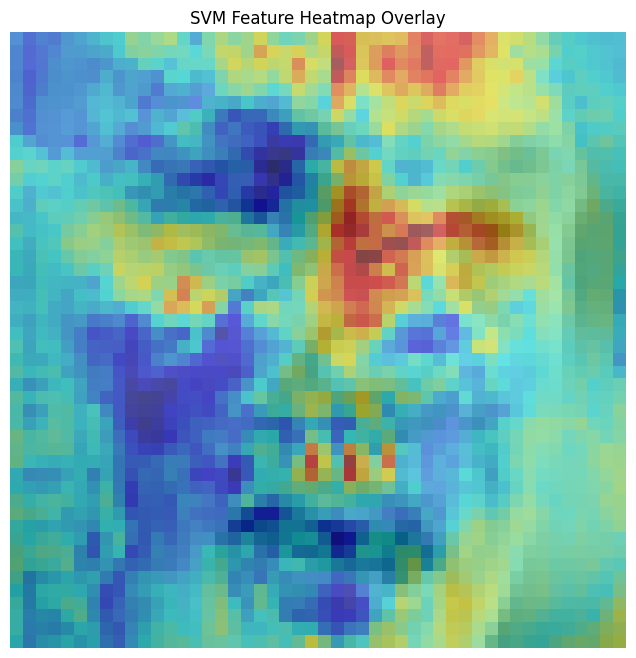

In [37]:
if svm_model.kernel == 'linear':
    coefficients = svm_model.coef_[0]
    reshaped_coefficients = coefficients.reshape(48, 48)
    plt.figure(figsize=(8, 8))
    plt.imshow(reshaped_coefficients, cmap='viridis')
    plt.title('SVM Feature Importance (Class 1)')
    plt.colorbar()
    plt.show()
else:
    print("Feature visualization is only supported for linear SVM models.")
import cv2

# Load a sample image from the dataset
sample_image = X_test[0].reshape(48, 48)  
coefficients_overlay = reshaped_coefficients

# Normalize the heatmap for overlay
normalized_heatmap = cv2.normalize(coefficients_overlay, None, 0, 255, cv2.NORM_MINMAX)
normalized_heatmap = normalized_heatmap.astype(np.uint8)

# Overlay the heatmap on the original image then show it
overlay = cv2.applyColorMap(normalized_heatmap, cv2.COLORMAP_JET)
overlay = cv2.addWeighted(overlay, 0.5, cv2.cvtColor((sample_image * 255).astype(np.uint8), cv2.COLOR_GRAY2BGR), 0.5, 0)
plt.figure(figsize=(8, 8))
plt.imshow(overlay)
plt.title("SVM Feature Heatmap Overlay")
plt.axis("off")
plt.show()


# Feature importance for Random Forest

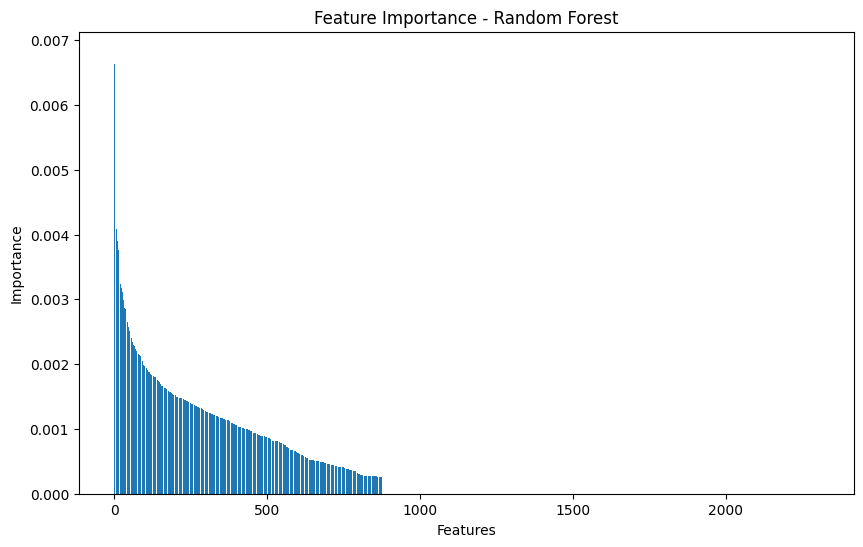

In [38]:
rf_importances = rf_best.feature_importances_
indices = np.argsort(rf_importances)[::-1]
plt.figure(figsize=(10, 6))
plt.title("Feature Importance - Random Forest")
plt.bar(range(len(rf_importances)), rf_importances[indices], align="center")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()


# Evaluate models

In [39]:
def evaluate_model(model, X_test, y_test, model_name):
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, average='weighted', zero_division=0)
    recall = recall_score(y_test, predictions, average='weighted', zero_division=0)
    f1 = f1_score(y_test, predictions, average='weighted', zero_division=0)
    print(f"{model_name} Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print("\nClassification Report:\n", classification_report(y_test, predictions))
    return accuracy, precision, recall, f1


# Evaluate SVM and RF

In [40]:
svm_metrics = evaluate_model(svm_best, X_test_flat, y_test, "SVM")
rf_metrics = evaluate_model(rf_best, X_test_flat, y_test, "Random Forest")


SVM Metrics:
Accuracy: 0.2188
Precision: 0.0479
Recall: 0.2188
F1-Score: 0.0785

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         6
           3       0.22      1.00      0.36         7
           4       0.00      0.00      0.00         8
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00         5

    accuracy                           0.22        32
   macro avg       0.04      0.17      0.06        32
weighted avg       0.05      0.22      0.08        32

Random Forest Metrics:
Accuracy: 0.2812
Precision: 0.1727
Recall: 0.2812
F1-Score: 0.2128

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         6
           3       0.38      0.71      0.50         7
           4       0

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

# Evaluate CNN

In [41]:
cnn_predictions = np.argmax(cnn_model.predict(test_data), axis=1)
cnn_accuracy = accuracy_score(test_data.classes, cnn_predictions)
cnn_precision = precision_score(test_data.classes, cnn_predictions, average='weighted', zero_division=0)
cnn_recall = recall_score(test_data.classes, cnn_predictions, average='weighted', zero_division=0)
cnn_f1 = f1_score(test_data.classes, cnn_predictions, average='weighted', zero_division=0)


225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


# Model Comparison

In [45]:
# Define metrics and values
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
values = [accuracies, precisions, recalls, f1_scores]

# Create the performance table
performance_table = pd.DataFrame(
    values,
    index=metrics,
    columns=['SVM', 'Random Forest', 'CNN']
)


Performance Metrics Table:
                SVM  Random Forest       CNN
Accuracy   0.218750       0.281250  0.134439
Precision  0.047852       0.172676  0.148895
Recall     0.218750       0.281250  0.134439
F1-Score   0.078526       0.212784  0.074834


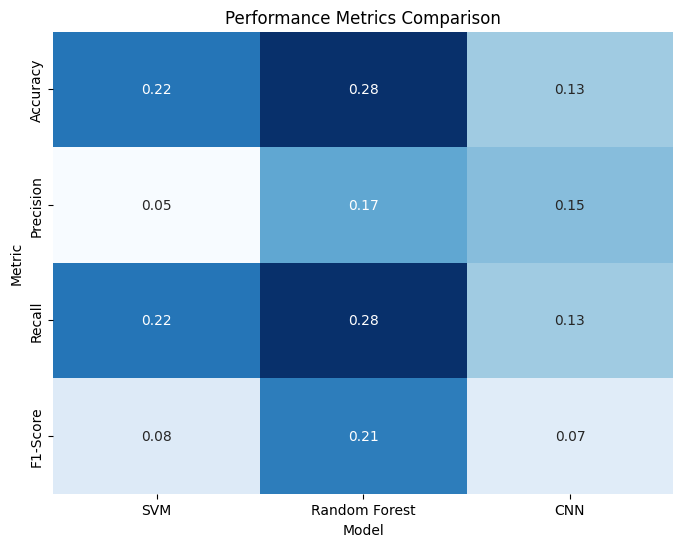

In [46]:
import pandas as pd
models = ['SVM', 'Random Forest', 'CNN']
accuracies = [svm_metrics[0], rf_metrics[0], cnn_accuracy]
precisions = [svm_metrics[1], rf_metrics[1], cnn_precision]
recalls = [svm_metrics[2], rf_metrics[2], cnn_recall]
f1_scores = [svm_metrics[3], rf_metrics[3], cnn_f1]


performance_table = pd.DataFrame(
    values,
    index=metrics,
    columns=['SVM', 'Random Forest', 'CNN']
)

# the table
print("Performance Metrics Table:")
print(performance_table)

# table as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(performance_table, annot=True, fmt=".2f", cmap="Blues", cbar=False)
plt.title("Performance Metrics Comparison")
plt.ylabel("Metric")
plt.xlabel("Model")
plt.show()



# Visualization of Metrics

In [48]:
def evaluate_model_with_roc(model, X_test, y_test, model_name):
    
    prob_predictions = model.predict(X_test)  
    predictions = np.argmax(prob_predictions, axis=1)  


    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, average='weighted', zero_division=0)
    recall = recall_score(y_test, predictions, average='weighted', zero_division=0)
    f1 = f1_score(y_test, predictions, average='weighted', zero_division=0)


    roc_auc = None
    try:
        roc_auc = roc_auc_score(y_test, prob_predictions, multi_class='ovo', average='weighted')
    except ValueError:
        roc_auc = None  

    print(f"{model_name} Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"ROC-AUC Score: {roc_auc:.4f}" if roc_auc else "ROC-AUC Score: Not Available")
    print("\nClassification Report:\n", classification_report(y_test, predictions))

    return accuracy, precision, recall, f1, roc_auc


In [49]:
results = []
results.append(svm_metrics)
results.append(rf_metrics)
results.append(cnn_metrics)


In [52]:
def evaluate_model_with_roc(predictions, probabilities, y_true, model_name):

    accuracy = accuracy_score(y_true, predictions)
    precision = precision_score(y_true, predictions, average="weighted", zero_division=0)
    recall = recall_score(y_true, predictions, average="weighted", zero_division=0)
    f1 = f1_score(y_true, predictions, average="weighted", zero_division=0)

    
    try:
        roc_auc = roc_auc_score(y_true, probabilities, multi_class="ovo", average="weighted")
    except ValueError:
        roc_auc = None

    print(f"{model_name} Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}" if roc_auc else "ROC-AUC: Not Available")

    return accuracy, precision, recall, f1, roc_auc


In [53]:

svm_predictions = svm_best.predict(X_test_flat)
svm_probabilities = svm_best.predict_proba(X_test_flat)
svm_metrics = evaluate_model_with_roc(svm_predictions, svm_probabilities, y_test, "SVM")


rf_predictions = rf_best.predict(X_test_flat)
rf_probabilities = rf_best.predict_proba(X_test_flat)
rf_metrics = evaluate_model_with_roc(rf_predictions, rf_probabilities, y_test, "Random Forest")


cnn_metrics = evaluate_model_with_roc(cnn_predictions, cnn_probabilities, test_data.classes, "CNN")


SVM Metrics:
Accuracy: 0.2188
Precision: 0.0479
Recall: 0.2188
F1-Score: 0.0785
ROC-AUC: 0.4722
Random Forest Metrics:
Accuracy: 0.2812
Precision: 0.1727
Recall: 0.2812
F1-Score: 0.2128
ROC-AUC: 0.5771
CNN Metrics:
Accuracy: 0.1344
Precision: 0.1489
Recall: 0.1344
F1-Score: 0.0748
ROC-AUC: 0.4939


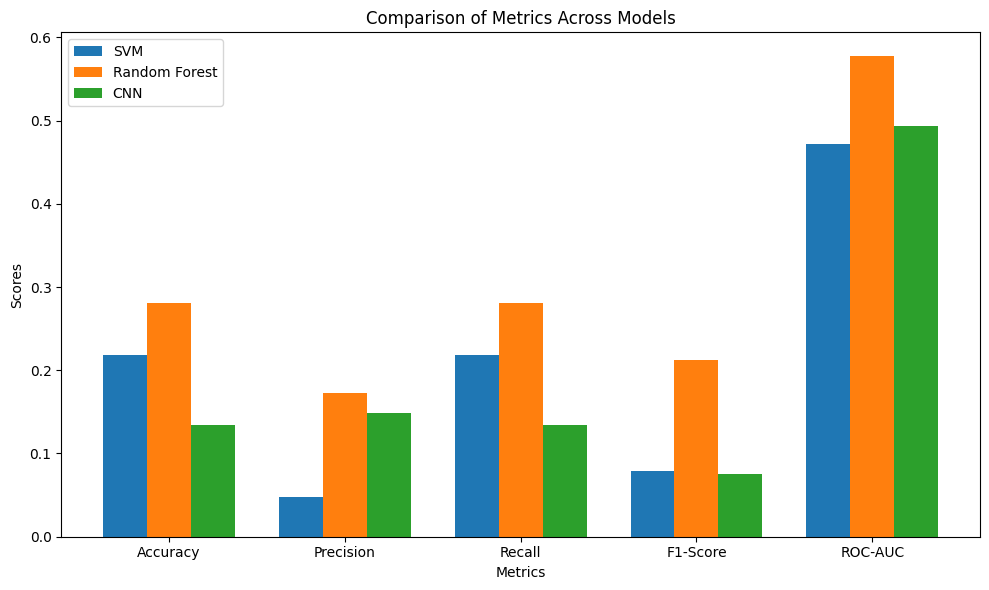

In [54]:

roc_aucs = [svm_metrics[4], rf_metrics[4], cnn_metrics[4]]


metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
values = {
    'SVM': [svm_metrics[0], svm_metrics[1], svm_metrics[2], svm_metrics[3], svm_metrics[4]],
    'Random Forest': [rf_metrics[0], rf_metrics[1], rf_metrics[2], rf_metrics[3], rf_metrics[4]],
    'CNN': [cnn_metrics[0], cnn_metrics[1], cnn_metrics[2], cnn_metrics[3], cnn_metrics[4]],
}


x = np.arange(len(metrics))  
width = 0.25  


fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(x - width, values['SVM'], width, label='SVM')
bar2 = ax.bar(x, values['Random Forest'], width, label='Random Forest')
bar3 = ax.bar(x + width, values['CNN'], width, label='CNN')


ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Metrics Across Models')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()


plt.tight_layout()
plt.show()


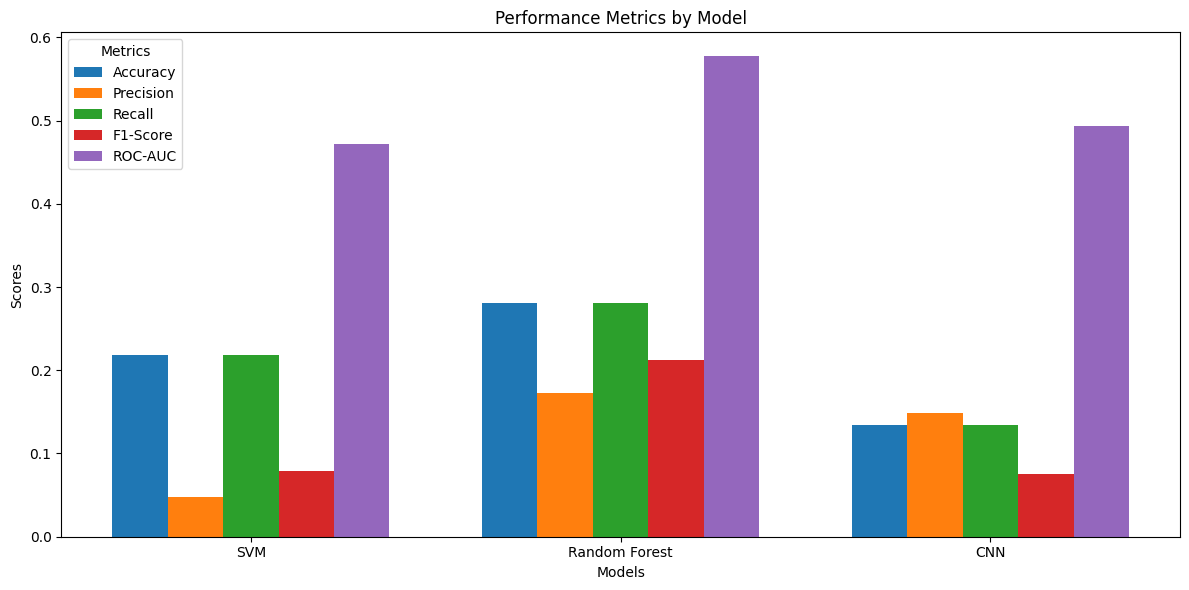

In [55]:

model_names = ['SVM', 'Random Forest', 'CNN']
accuracy_values = [svm_metrics[0], rf_metrics[0], cnn_metrics[0]]
precision_values = [svm_metrics[1], rf_metrics[1], cnn_metrics[1]]
recall_values = [svm_metrics[2], rf_metrics[2], cnn_metrics[2]]
f1_values = [svm_metrics[3], rf_metrics[3], cnn_metrics[3]]
roc_auc_values = [svm_metrics[4], rf_metrics[4], cnn_metrics[4]]


metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
metric_values = [accuracy_values, precision_values, recall_values, f1_values, roc_auc_values]


x = np.arange(len(model_names)) 
width = 0.15  


fig, ax = plt.subplots(figsize=(12, 6))

for i, (metric, values) in enumerate(zip(metrics_to_plot, metric_values)):
    ax.bar(x + i * width, values, width, label=metric)

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Performance Metrics by Model')
ax.set_xticks(x + width * (len(metrics_to_plot) - 1) / 2)  
ax.set_xticklabels(model_names)
ax.legend(title='Metrics')

plt.tight_layout()
plt.show()


# Save metrics in text file


In [56]:
# Save Metrics to a Text File
with open('model_results.txt', 'w') as f:
    f.write("Model Performance Metrics:\n\n")

    # SVM Metrics
    f.write("SVM:\n")
    f.write(f"Accuracy: {svm_metrics[0]:.4f}\n")
    f.write(f"Precision: {svm_metrics[1]:.4f}\n")
    f.write(f"Recall: {svm_metrics[2]:.4f}\n")
    f.write(f"F1-Score: {svm_metrics[3]:.4f}\n")
    f.write(f"ROC-AUC: {'{:.4f}'.format(svm_metrics[4]) if svm_metrics[4] is not None else 'Not Available'}\n\n")

    # Random Forest Metrics
    f.write("Random Forest:\n")
    f.write(f"Accuracy: {rf_metrics[0]:.4f}\n")
    f.write(f"Precision: {rf_metrics[1]:.4f}\n")
    f.write(f"Recall: {rf_metrics[2]:.4f}\n")
    f.write(f"F1-Score: {rf_metrics[3]:.4f}\n")
    f.write(f"ROC-AUC: {'{:.4f}'.format(rf_metrics[4]) if rf_metrics[4] is not None else 'Not Available'}\n\n")

    # CNN Metrics
    f.write("CNN:\n")
    f.write(f"Accuracy: {cnn_metrics[0]:.4f}\n")
    f.write(f"Precision: {cnn_metrics[1]:.4f}\n")
    f.write(f"Recall: {cnn_metrics[2]:.4f}\n")
    f.write(f"F1-Score: {cnn_metrics[3]:.4f}\n")
    f.write(f"ROC-AUC: {'{:.4f}'.format(cnn_metrics[4]) if cnn_metrics[4] is not None else 'Not Available'}\n")
